In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib import request
module_url = f"https://drive.google.com/uc?export=view&id=1hY39I4hSxBv6f4LtZd-s48Lej9vVv40H"
module_name = 'marks.csv'
module_url2 = f"https://drive.google.com/uc?export=view&id=1L8TIbu_DKDOqqjmxJ9f4ZUpUyqbCNcwd"
module_name2 = 'comments.csv'
print(f'Fetching {module_url}')
with request.urlopen(module_url) as f, open(module_name,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
print(f'Fetching {module_url2}')
with request.urlopen(module_url2) as f, open(module_name2,'w') as outf:
  a = f.read()
  outf.write(a.decode('utf-8'))
marks = pd.read_csv('marks.csv')
comments = pd.read_csv('comments.csv')

Fetching https://drive.google.com/uc?export=view&id=1hY39I4hSxBv6f4LtZd-s48Lej9vVv40H
Fetching https://drive.google.com/uc?export=view&id=1L8TIbu_DKDOqqjmxJ9f4ZUpUyqbCNcwd


In [2]:
marks.head(5)
# The value in each column represent the total marks you received from that part of the question.
# Columns in the end - "Overall - rounded" refers to your overall Coursework 2 mark after bonus addition and rounding.
# For querying your marks, please navigate to the next cell.

,Number,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q2.3,Q2.4,Bonus,Overall - rounded
0,FULL MARK,20.0,15.00,10.0,15.00,9.00,15.00,16.00,5.0,100.0
1,C22106798,15.6,8.94,10.0,6.75,7.92,13.50,3.01,5.0,71.0
2,C22113539,15.7,9.80,5.5,6.96,1.80,13.50,12.80,5.0,71.0
3,C22083313,18.0,6.64,10.0,6.90,2.34,0.15,2.41,5.0,51.0
4,C21052346,20.0,13.60,7.5,10.05,7.74,15.00,12.68,5.0,92.0


In [ ]:
# Find your mark
# replace the string 'TOTAL MARKS' below with your number 'C00000000'
# "C" will be capital
# The last column is your overall mark out of 100. 
# Max marks: Q1=45, Q2=55.
your_number = 'TOTAL MARKS' 
your_marks = marks[marks['Number'] == your_number]
your_marks

In [9]:
# Check your marker comments
# replace the string 'TOTAL MARKS' below with your number 'C00000000'
your_number = 'TOTAL MARKS' 
your_comments = comments[comments['Number'] == your_number]
for com in your_comments.Comments.values[0].split(" /// "):
    print(com)

Q1.1.1: Slightly different returns but still distinction
Q1.1.2: Well done
Q1.2.1: Well done
Q1.2.2: Well done
Q.1.2.3: Well done
Q1.3: Limitted reference usage
Q2.1.1: Wrong logic and not expected outcome
Q2.1.2: Wrong logic and not expected outcome
Q2.1.3: Good approach but was required to check unique fighter here. 
Q2.1.4: Fig 1 does not have a colorbar but a good try. 
Q2.2: Your code does the correct job but some more variables do exist. Could not figure out why those are returned. 
Q2.3: Well done
Q2.4.1: Well done
Q2.4.2: Plotted figure is correct but the values in it is incorrect. So stylewise you got the marks, technical marks lost.
Q2.4.3: MSE should have been calculated manually.



In [10]:
# Create a dataframe for overall class statistics
marks.loc[:,'Q1.1':].agg(['mean', 'median', 'std'])

,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q2.3,Q2.4,Bonus,Overall - rounded
mean,15.912667,11.742889,8.191667,8.752889,6.409167,12.137111,10.219000,4.861111,78.166667
median,18.000000,13.000000,10.000000,8.850000,7.380000,13.500000,11.530000,5.000000,84.000000
std,5.374684,3.953931,2.512925,2.510187,2.783434,4.590776,4.923135,0.823970,21.153205


In [12]:
# Distribution of studens based on Mark
d = {'Fail':[0, 50], 'Pass':[50, 60], 'Merit':[60, 70], 'Distinction':[70, 100.1]}
perf = pd.DataFrame({'Mark':['Fail', 'Pass', 'Merit', 'Distinction']})
perf['Num Students'] = 0
for key, value in d.items():
    perf.loc[perf['Mark'] == key,'Num Students'] = marks[(marks['Overall - rounded']>=value[0])*(marks['Overall - rounded']<value[1])]['Overall - rounded'].agg(['count']).values[0]
perf['Percentage'] = 100*perf['Num Students']/perf['Num Students'].sum()
perf

,Mark,Num Students,Percentage
0,Fail,13,7.222222
1,Pass,10,5.555556
2,Merit,19,10.555556
3,Distinction,138,76.666667


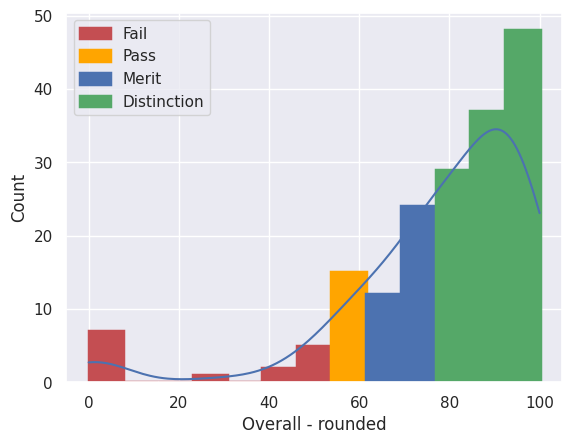

In [13]:
# Plot a histogram for total marks
sns.set(color_codes=True)
ax = sns.histplot(data=marks, x="Overall - rounded", linewidth=2.5, kde=True)
for p in ax.patches:
    if p.get_x() < 50:
        p.set_color('r')
        p.set_label('Fail')
    elif p.get_x() < 60:
        p.set_color('orange')
        p.set_label('Pass')
    elif p.get_x() < 70:
        p.set_color('b')
        p.set_label('Merit')
    else:
        p.set_color('g')
        p.set_label('Distinction')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())   

Text(0, 0.5, 'Total Mark')

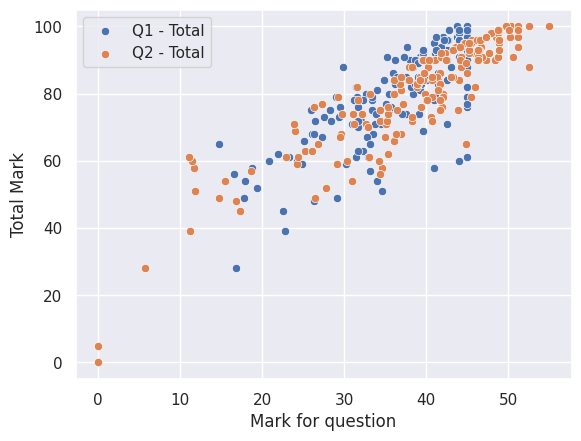

In [16]:
marks['Q1 - Total'] = marks.apply(lambda x: x['Q1.1'] + x['Q1.2'] + x['Q1.3'], axis=1)
marks['Q2 - Total'] = marks.apply(lambda x: x['Q2.1'] + x['Q2.2'] + x['Q2.3'] + x['Q2.4'], axis=1)
for col in ['Q1 - Total','Q2 - Total']: 
    sns.scatterplot(data=marks, x=col, y='Overall - rounded', label=col)
plt.legend()
plt.xlabel('Mark for question')
plt.ylabel('Total Mark')

In [17]:
# Boxplot for each question
px.box(marks, x=['Q1 - Total', 'Q2 - Total', 'Overall - rounded'], width=600, height=400,
       labels={'value':'Marks', 'variable':'Question'}, template="simple_white", notched=True)